In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

## Clustering is ...

... the process of collecting a set of objects into groups or clusters of similar items

#### For example,

- Discover different species of birds based on their photographs
- Segment an image based on the pixel colors
- Organize news articles that cover the same story

<img src=http://www.codeproject.com/KB/recipes/439890/clustering-process.png width=450 align=left>

## Types of Algorithms

- Flat

>0. Start with a random partitioning
>0. Iterate to improve the grouping

- Hierarchical

>0. Greedy grouping of closest: bottom up
>0. Greedy splitting of farthest: top down

### Flat example

<img src=files/kmeans.gif>
<!--
<img src=http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif  align=left width=300> -->

### Hierarchical example

> Set

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Clusters.svg/250px-Clusters.svg.png width=150 align=center>

> Dendogram

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png width=250>

## $k$-means clustering

A simple (flat) algorithm

### Optimization

- Formally, it's an optimization over the possible groupings of objects

> For a set of $\{ x_l \}$ where $x_l\in \mathbb{R}^d$ for all $l$

>$\displaystyle  \hat{\boldsymbol{C}} = \textrm{arg}\min_{\boldsymbol{C}} \sum_{i=1}^k \left[\ \sum_{x\in{}C_i}\ \lvert\lvert x-\mu_i\rvert\rvert^2 \right] $

> where 

>$\displaystyle  \mu_i = \frac{1}{\det{C_i}}\sum_{x\in{}C_i} x $

### Algorithm

- Iteratively improving the $\mu_i$ **prototypes** of $k$ clusters

>0. Pick $k$ random objects as the initial $\mu_i$ prototypes
>0. Find for each object the closest prototype and assign to that cluster
>0. Calculate the averages for each cluster to get new $\mu_i$
>0. Repeat until convergence

- Often very fast - but no proof

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2] 

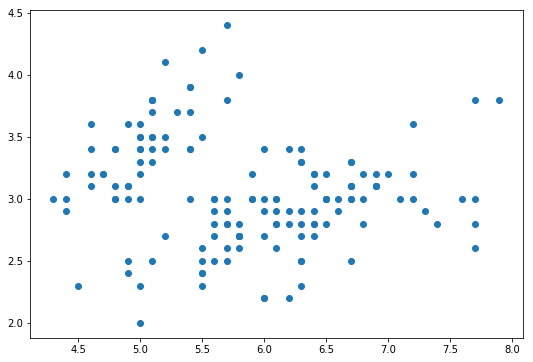

In [11]:
plt.figure(figsize=(30,30)); 
plt.subplot(131,aspect='equal')
plt.scatter(X[:,0],X[:,1]);

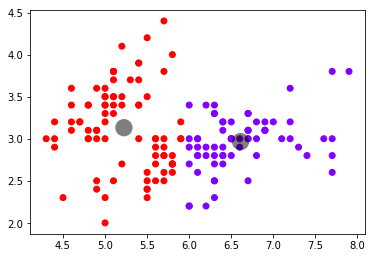

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=2, n_init=100)
kmeans.fit(X)

plt.figure(figsize=(6,6)); plt.subplot(aspect='equal')
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow');

C = kmeans.cluster_centers_
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

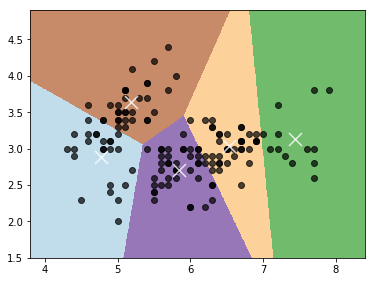

In [18]:
# Step size of the mesh. 
h = .005    # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() -.5, X[:, 0].max() +.5
y_min, y_max = X[:, 1].min() -.5, X[:, 1].max() +.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
P = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
P = P.reshape(xx.shape)
plt.figure(figsize=(6,6)); plt.subplot(111,aspect='equal')
plt.clf()

plt.imshow(P, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='equal', origin='lower', alpha=0.7)

plt.scatter(X[:, 0], X[:, 1], c='k', alpha=0.7)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10, alpha=0.8)

plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);

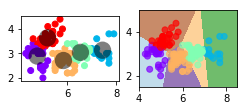

In [16]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
C, L = kmeans.cluster_centers_, kmeans.labels_

plt.subplot(132,aspect='equal')
plt.scatter(X[:,0],X[:,1],c=L,cmap='rainbow');
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

if True:
    h = .005 # point in the mesh [x_min, m_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = 4, 8.5
    y_min, y_max = 1.5, 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    P = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    P = P.reshape(xx.shape)

    # Put the result into a color plot
    plt.subplot(133,aspect='equal')
    plt.imshow(P, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap='Paired',
               aspect='equal', origin='lower', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=L, alpha=0.7, cmap='rainbow')

## Limitations

- Initialization matters

> Rerun multiple times: **n_init** (default=10) <br/>
> Smart(er) starting points

- Assumes spherical clusters (use of distance function)

> Preprocessing becomes important even in simple cases <br>
> For example, whitening...

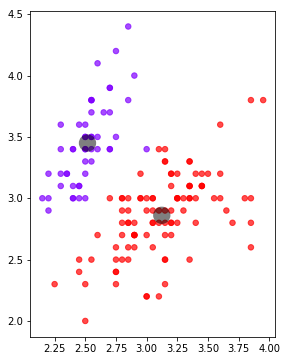

In [20]:
# transformations might help
Z = X.copy()
Z[:,0] *= 0.5

kmeans = KMeans(n_clusters=2,n_init=100,init='k-means++')
kmeans.fit(Z)
C, L = kmeans.cluster_centers_, kmeans.labels_

plt.figure(figsize=(6,6)); plt.subplot(aspect='equal')
plt.scatter(Z[:,0],Z[:,1],c= L, marker='o',s= 30,alpha=0.7,cmap='rainbow');
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

In [21]:
kmeans.inertia_, kmeans.score(X), kmeans.n_clusters

(30.063975000000003, -1245.8812875, 2)

## So This Won't Work!

<img src=http://www.squobble.com/academic/ftvmimo/spiral_A.png width=250 align=left>

## What $k$?

- How many clusters?

> Too many? <br/>
> Too few?

- Various diagnostics

> Check the minimum value of the cost function? <br/>
> Characterize the clusters - Gaussian? spherical?



## Example

- Run $k$-means
- Try different parameters
- How many clusters did you find?

In [5]:
# Okay, you didn't see this because this generates the data
from scipy.stats import norm
np.random.seed(seed=1)
x1 = norm.rvs(0, 0.99, size=(3, 66)); x1[0,:] += 2.1
x2 = norm.rvs(0, 0.99, size=(3, 67)); x2[1,:] += 2.1
x3 = norm.rvs(0, 0.99, size=(3, 67)); x3[2,:] += 6
X = np.hstack((x1,x2,x3)).T
np.savetxt("Class-Clusters.csv", X, delimiter=","); del X

(200, 3)

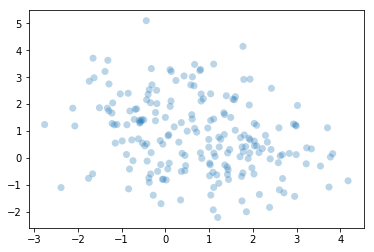

In [6]:
X = np.loadtxt('Class-Clusters.csv', delimiter=',')
plt.scatter(X[:,0],X[:,1],s=50,alpha=0.3,edgecolor='none');
X.shape

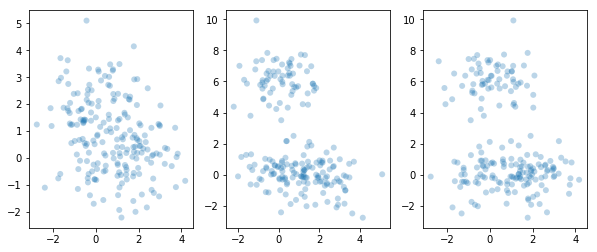

In [7]:
plt.figure(figsize=(10,4))
for i,m,n in [(1,0,1),(2,1,2),(3,0,2)]:
    plt.subplot(1,3,i)
    plt.scatter(X[:,m],X[:,n],alpha=0.3, edgecolor='none');

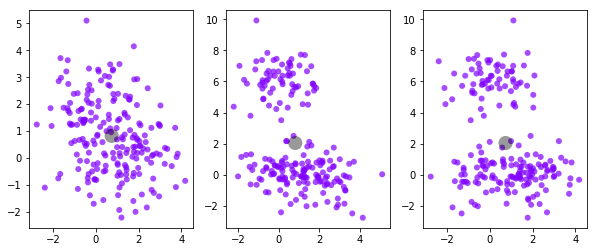

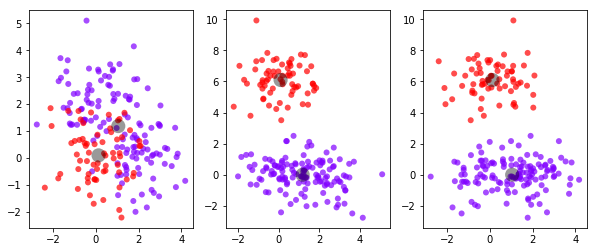

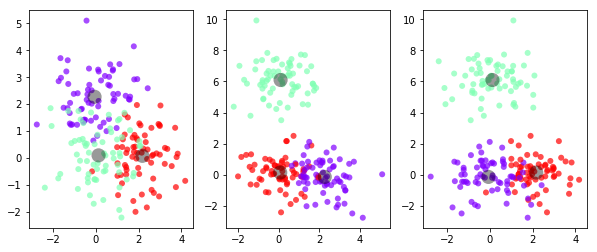

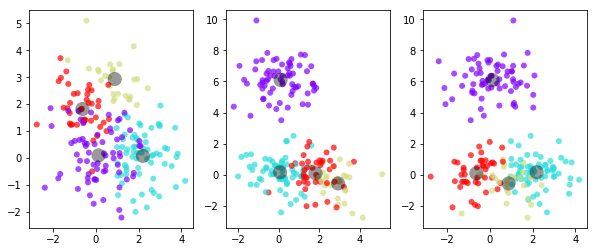

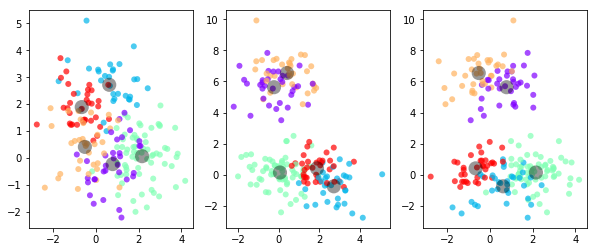

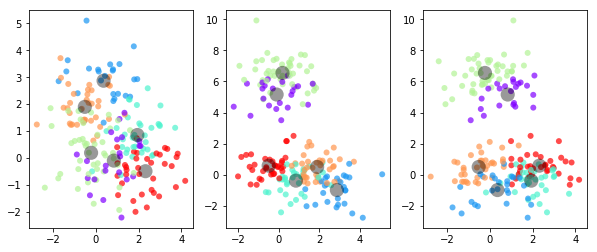

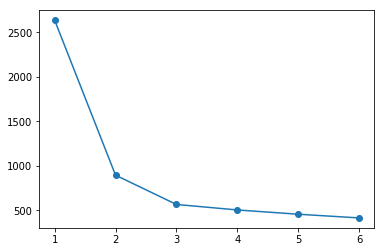

In [8]:
klist = []
ilist = []
for k in range(1,7):
    kmeans = KMeans(n_clusters=k, copy_x=False)
    kmeans.fit(X)
    klist.append(k)
    ilist.append(kmeans.inertia_)
    if True:
        C, L = kmeans.cluster_centers_, kmeans.labels_
        plt.figure(figsize=(10,4))
        for i,m,n in [(1,0,1),(2,1,2),(3,0,2)]:
            plt.subplot(1,3,i) #,aspect='equal')
            plt.scatter(X[:,m],X[:,n],c=L,cmap='rainbow', alpha=0.7, edgecolor='none');
            plt.scatter(C[:,m],C[:,n],c='k',marker='o',s=200,alpha=0.4,edgecolor='none');
plt.figure(); plt.plot(klist,ilist,'o-');

## $k$-medians clustering

Replace mean with median for cluster centers

## Gaussian Mixture Models

- A probabilistic approach to clustering

> Infer the parameters of $k$ **components**

- For example, a mixture of two Gaussians ($k\!=\!2$)

> **Parameters** $\boldsymbol{\theta}$ are $(\mu_1,\Sigma_1),\ (\mu_2,\Sigma_2)$ and the<br>
> cluster membership probabilities $\boldsymbol{\kappa}$ 


## GMM with $k=2$


- Difficult because of the unknown cluster memberships $\boldsymbol{\kappa}$

> $\kappa_i$ is the probability of that $x_i$ belongs to component 1 <br>
> $(1\!-\!\kappa_i)$ is the prob of belonging to component 2

- Likelihood function

>$\displaystyle L(\boldsymbol{\theta};\boldsymbol{x}) = \prod_{i=1}^n \Big[ \kappa_i\, G\left(x_i;\mu_1,\Sigma_1\right) + (1\!-\!\kappa_i)\, G\left(x_i; \mu_2,\Sigma_2\right)\Big]$

## Expectation-Maximization Algorithm

- The EM algorithm is a general framework

>0. Create an initial model $\theta$
>0. Find a better $\theta'$ s.t. <br> 
> the likelihood improves: $p(D\mid\theta') > p(D\mid\theta)$ <br/> 
> (or the posterior)
>0. Repeat until convergence


## Step-by-step
<img src=http://orig02.deviantart.net/e551/f/2012/098/9/a/3_easy_steps_to_draw_mona_lisa____by_mcdaotri21-d4vhuu2.png align=left width=450>

## E-step

- Calculate the membership probabilities $\boldsymbol{\kappa}$

> Based on the current model $(\mu_1,\mu_2,\Sigma_1,\Sigma_2)$ and data $\boldsymbol{x}$

## M-step

- Maximize the likelihood function 

> Based on the estimated membership probabilities

- In spirit, this is not completely unlike $k$-means clustering algorithm

## Visual Example

<!--
<img src=https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif align=left>
-->

<img src=https://upload.wikimedia.org/wikipedia/commons/a/a7/Em_old_faithful.gif align=left width=400>

## Iris

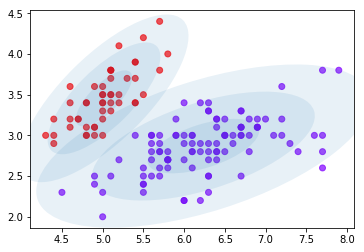

In [24]:
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from matplotlib.patches import Ellipse
from math import pi
#from math import arctan2

iris = datasets.load_iris()
X = iris.data[:,:2] # only 2 features

gmm = GaussianMixture(n_components=2)
gmm.fit(X)
Cpred = gmm.predict(X)

ax = plt.subplot(111, aspect='equal')
plt.scatter(X[:,0], X[:,1], c=Cpred, cmap='rainbow', alpha=0.7)

for n in np.arange(gmm.n_components): 
    cov = gmm.covariances_[n][:2,:2] 
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * np.arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

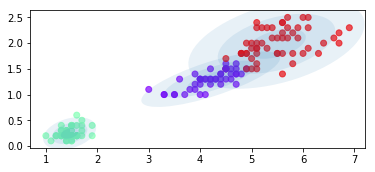

In [30]:
# cluster on all features w/ plotting another projection
iris = datasets.load_iris()
X = iris.data[:,:] 

    
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
Cpred = gmm.predict(X)

ax = plt.subplot(111, aspect='equal')
if False: # coloring by the true class memberships
    plt.scatter(X[:,2], X[:,3], c=iris.target, cmap='rainbow', alpha=0.7) 
else:
    plt.scatter(X[:,2], X[:,3], c=Cpred, cmap='rainbow', alpha=0.7) 
    
for n in np.arange(gmm.n_components): 
    cov = gmm.covariances_[n][2:,2:] 
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * np.arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,2:], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

In [31]:
gmm.covariances_[0].shape

(4, 4)

In [32]:
gmm.predict(X)[:5]

array([1, 1, 1, 1, 1])

In [33]:
gmm.predict_proba(X)[:5]

array([[9.06516804e-44, 1.00000000e+00, 6.39829159e-35],
       [8.53836828e-31, 1.00000000e+00, 2.59954184e-28],
       [9.37295905e-36, 1.00000000e+00, 4.21198692e-30],
       [1.46701195e-31, 1.00000000e+00, 2.71194113e-26],
       [3.36751068e-46, 1.00000000e+00, 2.68318787e-35]])

## What Gaussian?

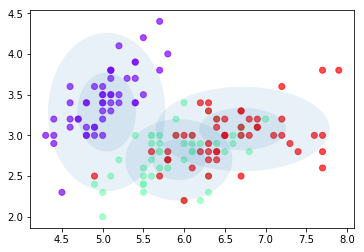

In [37]:
X = X[:,:2]
ax = plt.subplot(111, aspect='equal')
plt.scatter(X[:,0], X[:,1], c=iris.target, cmap='rainbow', alpha=0.7)

gmm = GaussianMixture(n_components=3, covariance_type='diag')
gmm.fit(X)

for n in np.arange(gmm.n_components): 
    if gmm.covariance_type == 'spherical': cov = eye(X.shape[1])*gmm.covariances_[n]
    elif gmm.covariance_type == 'full': cov = gmm.covariances_[n][:2, :2]
    elif gmm.covariance_type == 'tied': cov = gmm.covariances_[:2, :2]
    elif gmm.covariance_type == 'diag': cov = np.diag(gmm.covariances_[n][:2])
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * np.arctan2(w[0,1],w[0,0])
    for i in range(1,3):
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

## Decision Boundaries

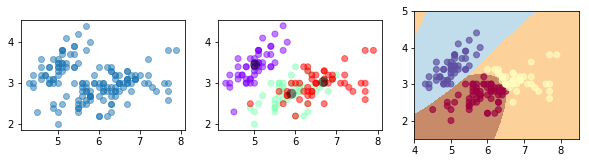

In [40]:
X = iris.data[:,:2] # only 2 features

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)
C = gmm.means_

plt.figure(figsize=(10,4)); 
ax=plt.subplot(131,aspect='equal')
plt.scatter(X[:,0],X[:,1], alpha=0.5);

ax=plt.subplot(132,aspect='equal')
plt.scatter(X[:,0],X[:,1],c=iris.target,cmap='rainbow', alpha=0.5);
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=100,alpha=0.5,edgecolor='none');

if True:
    h = .005 # point in the mesh [x_min, m_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = 4, 8.5
    y_min, y_max = 1.5, 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    P = gmm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Put the result into a color plot
    ax=plt.subplot(133,aspect='equal')
    plt.imshow(P, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='equal', origin='lower', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), alpha=0.7, cmap='Spectral_r')

## Variants

<img src=http://scikit-learn.org/stable/_images/sphx_glr_plot_gmm_covariances_0011.png align=left width=400>

<!--<img src=files/plot_gmm_classifier_0011.png align=left width=400>-->


## Comparison

- Gaussian Mixture Model

> Find components with matching distribution

- $k$-means clustering

> Tends to yield spherical clusters with similar sizes

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/ClusterAnalysis_Mouse.svg/675px-ClusterAnalysis_Mouse.svg.png" width=600 align=left>

In [41]:
gmm.predict(X[:3])

array([0, 0, 0])

In [42]:
gmm.predict_proba(X[:3])

array([[9.99204553e-01, 7.09016312e-04, 8.64310149e-05],
       [9.55121142e-01, 1.36297355e-02, 3.12491224e-02],
       [9.98856020e-01, 8.01996185e-04, 3.41983504e-04]])

In [43]:
gmm.score(X)

-1.4980073602870045

## Soft Clustering?

- GMM provides quality to each possible cluster membership

> Instead of just in/out, have the likelihoods for all